In [1940]:
# importation des librairy
import pandas as pd

from skimpy import skim
import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

## lecture des csv

In [1941]:
df_aeronefs = pd.read_csv('dataset/aeronefs_2024-06-02.csv')
df_composants = pd.read_csv('dataset/composants_2024-06-02.csv')
df_logs_vols = pd.read_csv('dataset/logs_vols.csv')
df_degradations = pd.read_csv('dataset/degradations.csv')

## Exploration, visualisation, nettoyage

### 1 - df_aeronefs

In [1942]:
df_aeronefs.head()

,ref_aero,type_model,debut_service,last_maint,en_maintenance,end_maint
0,E170_6353,E170,2000-03-17,2024-03-27 00:00:00,False,NaN
1,B767_2803,B767,2020-12-03,2024-06-01 00:00:00,False,NaN
2,CRJ700_6943,CRJ700,2015-01-29,2024-06-02,True,2024-06-03 14:13:00
3,A350_1177,A350,2005-08-07,2024-01-04 00:00:00,False,NaN
4,B777_4029,B777,2009-01-01,2024-06-01 00:00:00,False,NaN


In [1943]:
# info sur le df
skim(df_aeronefs)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 232    │ │ string      │ 5     │                                                          │
│ │ Number of columns │ 6      │ │ bool        │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                      bool                                                       │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                             ┃ true           ┃ true rate                  ┃ hist               ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ en_maintenance                          │             15 │                      0.065 │       ▇    ▁       │  │
│ └─────────────────────────────────────────┴────────────────┴────────────────────────────┴────────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                 ┃ NA       ┃ NA %        ┃ words per row              ┃ total words            ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ ref_aero                    │        0 │           0 │                          1 │                    232 │  │
│ │ type_model                  │        0 │           0 │                          1 │                    232 │  │
│ │ debut_service               │        0 │           0 │                          1 │                    232 │  │
│ │ last_maint                  │        0 │           0 │                        1.9 │                    449 │  │
│ │ end_maint                   │      217 │       93.53 │                       0.13 │                     30 │  │
│ └─────────────────────────────┴──────────┴─────────────┴────────────────────────────┴────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [1944]:
# retravaille des colonne date
cols = ['debut_service', 'last_maint', 'end_maint']

for col in cols:

    df_aeronefs[f'{col}_temp'] = pd.to_datetime(df_aeronefs[col], errors='coerce')
    df_aeronefs[f'{col}_temp'] = df_aeronefs.apply(lambda x : x[col] if pd.isna(x[f'{col}_temp']) else x[f'{col}_temp'], axis=1)

    df_aeronefs[col] = df_aeronefs[f'{col}_temp'] 

    # suppression de al colonne temporaire
    df_aeronefs = df_aeronefs.drop(f'{col}_temp', axis=1)

    df_aeronefs[col] = pd.to_datetime(df_aeronefs[col], errors='coerce')

df_aeronefs.head()

,ref_aero,type_model,debut_service,last_maint,en_maintenance,end_maint
0,E170_6353,E170,2000-03-17,2024-03-27,False,NaT
1,B767_2803,B767,2020-12-03,2024-06-01,False,NaT
2,CRJ700_6943,CRJ700,2015-01-29,2024-06-02,True,2024-06-03 14:13:00
3,A350_1177,A350,2005-08-07,2024-01-04,False,NaT
4,B777_4029,B777,2009-01-01,2024-06-01,False,NaT


In [1945]:
skim(df_aeronefs)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 232    │ │ datetime64  │ 3     │                                                          │
│ │ Number of columns │ 6      │ │ string      │ 2     │                                                          │
│ └───────────────────┴────────┘ │ bool        │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                      bool                                                       │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                             ┃ true           ┃ true rate                  ┃ hist               ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ en_maintenance                          │             15 │                      0.065 │       ▇    ▁       │  │
│ └─────────────────────────────────────────┴────────────────┴────────────────────────────┴────────────────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓  │
│ ┃ column_name        ┃ NA    ┃ NA %    ┃ first                     ┃ last                      ┃ frequency   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩  │
│ │ debut_service      │     0 │       0 │        2000-02-03         │        2022-11-11         │ None        │  │
│ │ last_maint         │     0 │       0 │        2023-07-02         │        2024-06-02         │ None        │  │
│ │ end_maint          │   217 │   93.53 │    2024-06-03 14:13:00    │    2024-06-16 14:13:00    │ None        │  │
│ └────────────────────┴───────┴─────────┴───────────────────────────┴───────────────────────────┴─────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ ref_aero                  │       0 │          0 │                            1 │                      232 │  │
│ │ type_model                │       0 │          0 │                            1 │                      232 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [1946]:
# observation des valeurs null par colonne
cols = df_aeronefs.columns

for col in cols:
    if len(df_aeronefs[df_aeronefs[col].isna()]) == 0:
        print(f'col : {col} ok plein')
    else:
        print()
        print(f'col : {col} avec des null')

col : ref_aero ok plein
col : type_model ok plein
col : debut_service ok plein
col : last_maint ok plein
col : en_maintenance ok plein

col : end_maint avec des null


<Axes: >

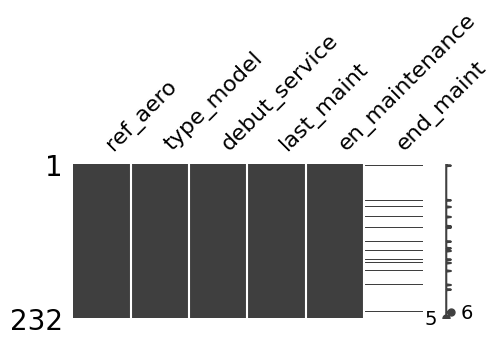

In [1947]:
msno.matrix(df_aeronefs, figsize=(5, 2))

In [1948]:
# vérification si avion en maintenance alors date de prevision de fin de maintenance et inverse vrai

df_temp_en_maintenance_T = df_aeronefs[df_aeronefs['en_maintenance'] ==True]

df_temp_en_maintenance_T[df_temp_en_maintenance_T['end_maint'].isna()]

,ref_aero,type_model,debut_service,last_maint,en_maintenance,end_maint


In [1949]:
df_temp_en_maintenance_F = df_aeronefs[df_aeronefs['en_maintenance'] == False]

df_temp_en_maintenance_F[~df_temp_en_maintenance_F['end_maint'].isna()]

,ref_aero,type_model,debut_service,last_maint,en_maintenance,end_maint


Conclusion sur les valuers Null de end_maintenance :
Si un avion est en maintence (True) alors il y a une date.
Si un avion n'est pas en maintenance alors le champ est null.

Il est potentielement possible de remplacer par la date du jour la fin de maintenance prévisionnel car ça signifie 0 jour jusqu'à la remise en service de l'appareil.

In [1950]:
# Remplacement des date par le nombre de jour à la date actuelle (float) et les valeurs null par des 0

df_aeronefs['end_maint'] = df_aeronefs.apply(lambda x : 0 if pd.isna(x['end_maint']) else (x['last_maint'] - x['end_maint']).total_seconds() /3600 /24  , axis=1)

In [1951]:
df_aeronefs.head()

,ref_aero,type_model,debut_service,last_maint,en_maintenance,end_maint
0,E170_6353,E170,2000-03-17,2024-03-27,False,0.000000
1,B767_2803,B767,2020-12-03,2024-06-01,False,0.000000
2,CRJ700_6943,CRJ700,2015-01-29,2024-06-02,True,-1.592361
3,A350_1177,A350,2005-08-07,2024-01-04,False,0.000000
4,B777_4029,B777,2009-01-01,2024-06-01,False,0.000000


In [1952]:
df_aeronefs.nunique()

ref_aero          231
type_model         15
debut_service     227
last_maint         79
en_maintenance      2
end_maint           3
dtype: int64

In [1953]:
# recherche du doublon de ref_aero et l'afficher.
duplicates = df_aeronefs[df_aeronefs.duplicated(subset='ref_aero', keep=False)]
print("Doublons basés sur la colonne 'ref_aero':")

duplicates

Doublons basés sur la colonne 'ref_aero':


,ref_aero,type_model,debut_service,last_maint,en_maintenance,end_maint
40,E170_5551,E170,2017-02-07,2024-06-01,False,0.0
230,E170_5551,E170,2021-04-10,2024-06-01,False,0.0


In [1954]:
# renommer les ref_aero si doublons ? 
# --> si ref_aero est reference après

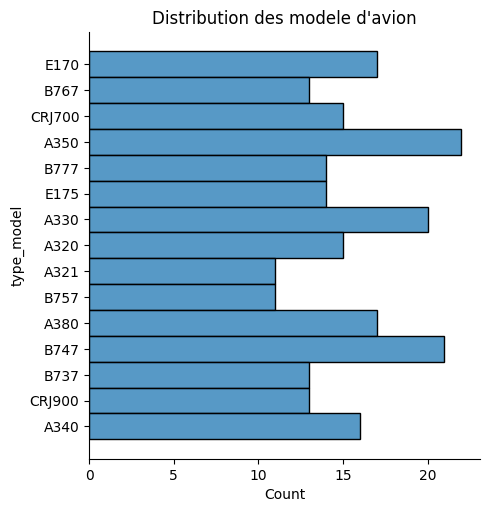

In [1955]:
#affichage de la repartition des model d'avion
sns.displot(data = df_aeronefs, y= 'type_model')
plt.title(f'Distribution des modele d\'avion')

plt.show()

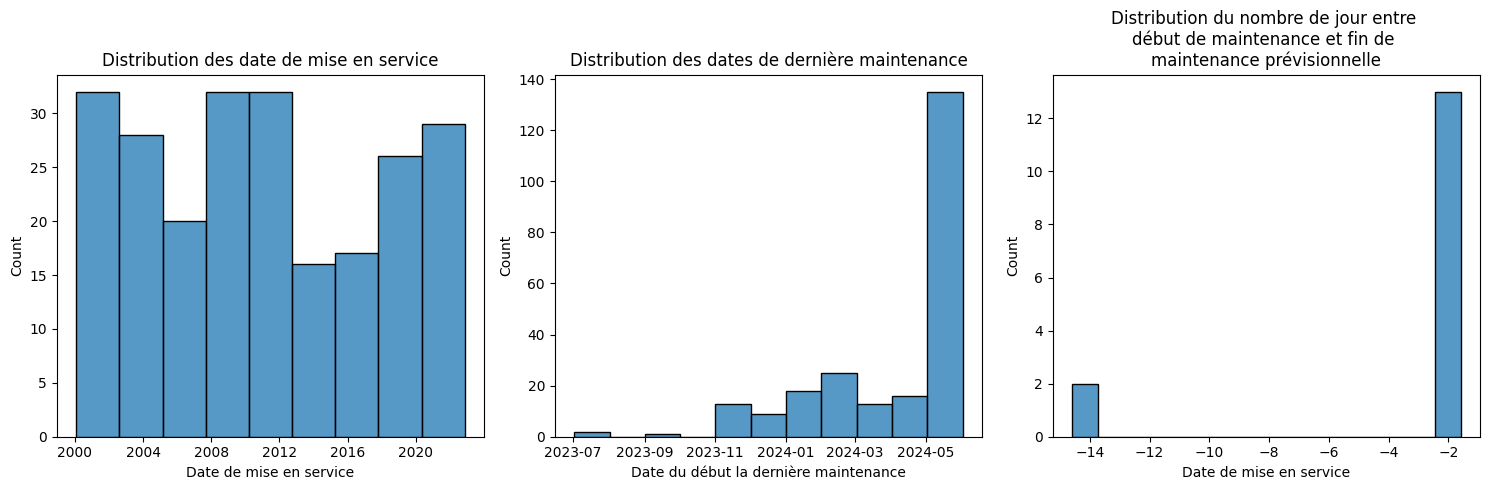

In [1956]:
# affichage des distribution sur les colonnes date

fig2, axs = plt.subplots(1, 3, figsize=(15,5))


sns.histplot(data = df_aeronefs['debut_service'], ax= axs[0])
axs[0].set_title(f'Distribution des date de mise en service')
axs[0].set_xlabel('Date de mise en service')

sns.histplot(data = df_aeronefs['last_maint'], ax= axs[1])
axs[1].set_title(f'Distribution des dates de dernière maintenance')
axs[1].set_xlabel('Date du début la dernière maintenance')

sns.histplot(data = df_aeronefs[df_aeronefs['end_maint'] != 0]['end_maint'], bins= 15, ax= axs[2])
axs[2].set_title(f'Distribution du nombre de jour entre \ndébut de maintenance et fin de \nmaintenance prévisionnelle')
axs[2].set_xlabel('Date de mise en service')

plt.tight_layout()
plt.show()

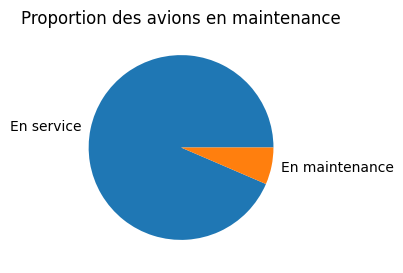

In [1957]:
#affichage de la repartition des en maintenance

# glpobal
compte = df_aeronefs['en_maintenance'].value_counts()
labels = ['En service', 'En maintenance']

fig= plt.figure(figsize=(3,3))

plt.pie(compte, labels = labels)
plt.title(f'Proportion des avions en maintenance')

plt.show()

### 2- df_composants

In [1958]:
df_composants.head()

,ref_compo,categorie,aero,desc,lifespan,taux_usure_actuel,cout
0,REAE170-E170_6353-0,Composants Critiques,E170_6353,Réacteur gauche,13045,53.308375,15552
1,REAE170-E170_6353-1,Composants Critiques,E170_6353,Réacteur droit,13626,50.111950,17559
2,SYSE170-E170_6353-2,Composants Critiques,E170_6353,Système de navigation,10541,16.730575,16514
3,ORDE170-E170_6353-3,Composants Critiques,E170_6353,Ordinateur de vol,10441,6.653075,16047
4,AUTE170-E170_6353-4,Composants Critiques,E170_6353,Autopilote,14847,42.033525,19362


In [1959]:
skim(df_composants)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 10440  │ │ string      │ 4     │                                                          │
│ │ Number of columns │ 7      │ │ int32       │ 2     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name          ┃ NA  ┃ NA %  ┃ mean   ┃ sd     ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ lifespan             │   0 │     0 │  13570 │   8481 │  10020 │  11020 │  12640 │  13630 │  68980 │   ▇    │  │
│ │ taux_usure_actuel    │   0 │     0 │  31.11 │  17.29 │   0.07 │  16.35 │  31.15 │  45.95 │  68.91 │ ▇▇▇▇▇▂ │  │
│ │ cout                 │   0 │     0 │  11420 │   5763 │   2021 │   4801 │  12660 │  16270 │  19490 │ ▇▁▂▇▅▇ │  │
│ └──────────────────────┴─────┴───────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ ref_compo                 │       0 │          0 │                            1 │                    10440 │  │
│ │ categorie                 │       0 │          0 │                            2 │                    20880 │  │
│ │ aero                      │       0 │          0 │                            1 │                    10440 │  │
│ │ desc                      │       0 │          0 │                            3 │                    31552 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [1960]:
# vérification des ref_composant --> doit etre unique pour chaque lignes
len(df_composants) - df_composants['ref_compo'].nunique()

45

In [1961]:
# recherche du doublon de ref_aero et l'afficher.
duplicates = df_composants[df_composants.duplicated(subset='ref_compo', keep=False)]
print("Doublons basés sur la colonne 'ref_compo':")

# tri du df sur les ref_compo
duplicates = duplicates.sort_values(by= ['ref_compo'])

duplicates

Doublons basés sur la colonne 'ref_compo':


,ref_compo,categorie,aero,desc,lifespan,taux_usure_actuel,cout
1820,AILE170-E170_5551-20,Composants Majeurs,E170_5551,Ailerons,10524,44.575544,10290
10370,AILE170-E170_5551-20,Composants Majeurs,E170_5551,Ailerons,10524,48.730000,10290
10354,AUTE170-E170_5551-4,Composants Critiques,E170_5551,Autopilote,14847,49.050000,19362
1804,AUTE170-E170_5551-4,Composants Critiques,E170_5551,Autopilote,14847,24.763782,19362
1837,DETE170-E170_5551-37,Composants Secondaires,E170_5551,Détecteurs de fumée,11066,58.522996,2147
...,...,...,...,...,...,...,...
1817,TRAE170-E170_5551-17,Composants Majeurs,E170_5551,Train d'atterrissage principal,10389,2.221234,12512
10368,TRAE170-E170_5551-18,Composants Majeurs,E170_5551,Train d'atterrissage avant,13964,48.040000,14173
1818,TRAE170-E170_5551-18,Composants Majeurs,E170_5551,Train d'atterrissage avant,13964,43.640184,14173
10361,UNIE170-E170_5551-11,Composants Critiques,E170_5551,Unité de gestion de l'air,13224,51.520000,17834


In [1962]:
df_composants.nunique()

ref_compo            10395
categorie                3
aero                   231
desc                    44
lifespan                44
taux_usure_actuel    10431
cout                    44
dtype: int64

In [1963]:
# suppression des doublons et garde les premier car taux d'usure plus important
df_composants = df_composants.drop_duplicates(subset='ref_compo', keep='first')

df_composants.head()

,ref_compo,categorie,aero,desc,lifespan,taux_usure_actuel,cout
0,REAE170-E170_6353-0,Composants Critiques,E170_6353,Réacteur gauche,13045,53.308375,15552
1,REAE170-E170_6353-1,Composants Critiques,E170_6353,Réacteur droit,13626,50.111950,17559
2,SYSE170-E170_6353-2,Composants Critiques,E170_6353,Système de navigation,10541,16.730575,16514
3,ORDE170-E170_6353-3,Composants Critiques,E170_6353,Ordinateur de vol,10441,6.653075,16047
4,AUTE170-E170_6353-4,Composants Critiques,E170_6353,Autopilote,14847,42.033525,19362


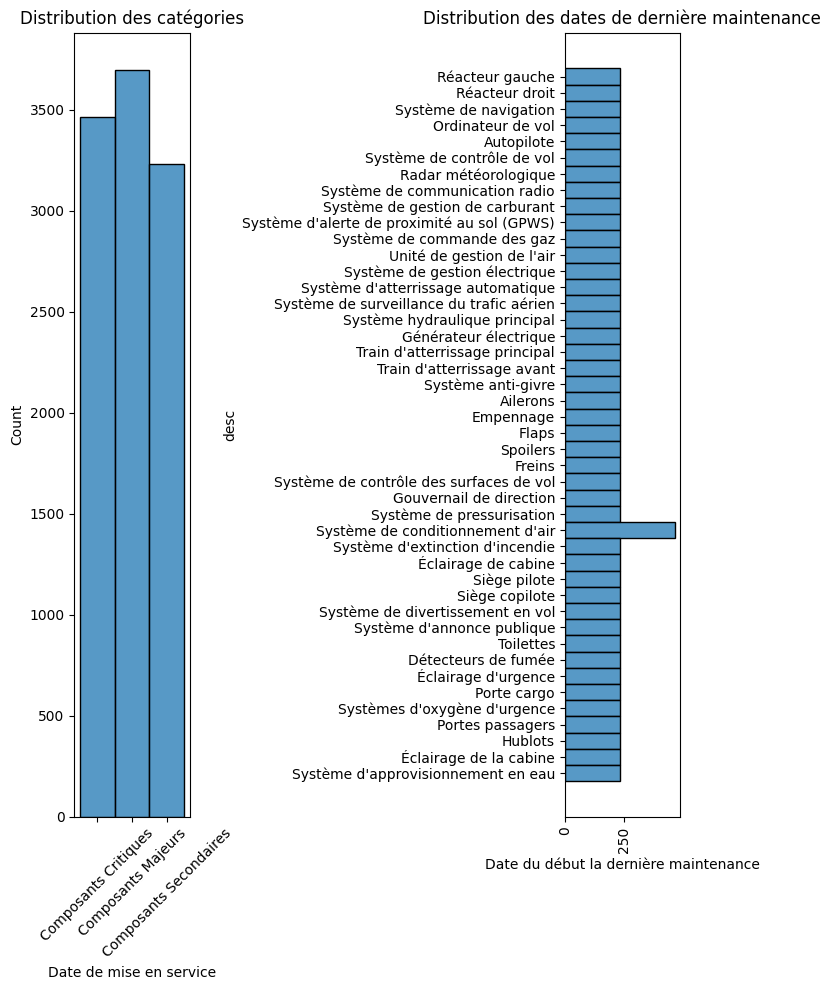

In [1964]:
# affichage des distribution sur les colonnes categoritielles

fig2, axs = plt.subplots(1, 2, figsize=(7,10))


sns.histplot(data = df_composants['categorie'], ax= axs[0])
axs[0].set_title(f'Distribution des catégories')
axs[0].set_xlabel('Date de mise en service')
axs[0].tick_params(axis='x', rotation=45)

sns.histplot(data = df_composants, y= 'desc', ax= axs[1])
axs[1].set_title(f'Distribution des dates de dernière maintenance')
axs[1].set_xlabel('Date du début la dernière maintenance')
axs[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [1965]:
# approfondissement sur le Système de conditionnement d'air
df_composants[df_composants['desc'] == 'Système de conditionnement d\'air']

,ref_compo,categorie,aero,desc,lifespan,taux_usure_actuel,cout
28,SYSE170-E170_6353-28,Composants Majeurs,E170_6353,Système de conditionnement d'air,10343,2.155725,13453
36,SYSE170-E170_6353-36,Composants Majeurs,E170_6353,Système de conditionnement d'air,10343,47.925725,13453
73,SYSB767-B767_2803-28,Composants Majeurs,B767_2803,Système de conditionnement d'air,10343,56.768522,13453
81,SYSB767-B767_2803-36,Composants Majeurs,B767_2803,Système de conditionnement d'air,10343,56.708522,13453
118,SYSCRJ700-CRJ700_6943-28,Composants Majeurs,CRJ700_6943,Système de conditionnement d'air,10343,51.727334,13453
...,...,...,...,...,...,...,...
10296,SYSA340-A340_4021-36,Composants Majeurs,A340_4021,Système de conditionnement d'air,10343,10.488310,13453
10333,SYSCRJ900-CRJ900_1740-28,Composants Majeurs,CRJ900_1740,Système de conditionnement d'air,10343,20.718522,13453
10341,SYSCRJ900-CRJ900_1740-36,Composants Majeurs,CRJ900_1740,Système de conditionnement d'air,10343,32.398522,13453
10423,SYSCRJ700-CRJ700_2988-28,Composants Majeurs,CRJ700_2988,Système de conditionnement d'air,10343,31.436648,13453


In [1966]:
# suppression des doublons observés sur le système d'AC
df_composants = df_composants.drop_duplicates(subset=['desc', 'categorie', 'aero'], keep='first')

df_composants.head()

,ref_compo,categorie,aero,desc,lifespan,taux_usure_actuel,cout
0,REAE170-E170_6353-0,Composants Critiques,E170_6353,Réacteur gauche,13045,53.308375,15552
1,REAE170-E170_6353-1,Composants Critiques,E170_6353,Réacteur droit,13626,50.111950,17559
2,SYSE170-E170_6353-2,Composants Critiques,E170_6353,Système de navigation,10541,16.730575,16514
3,ORDE170-E170_6353-3,Composants Critiques,E170_6353,Ordinateur de vol,10441,6.653075,16047
4,AUTE170-E170_6353-4,Composants Critiques,E170_6353,Autopilote,14847,42.033525,19362


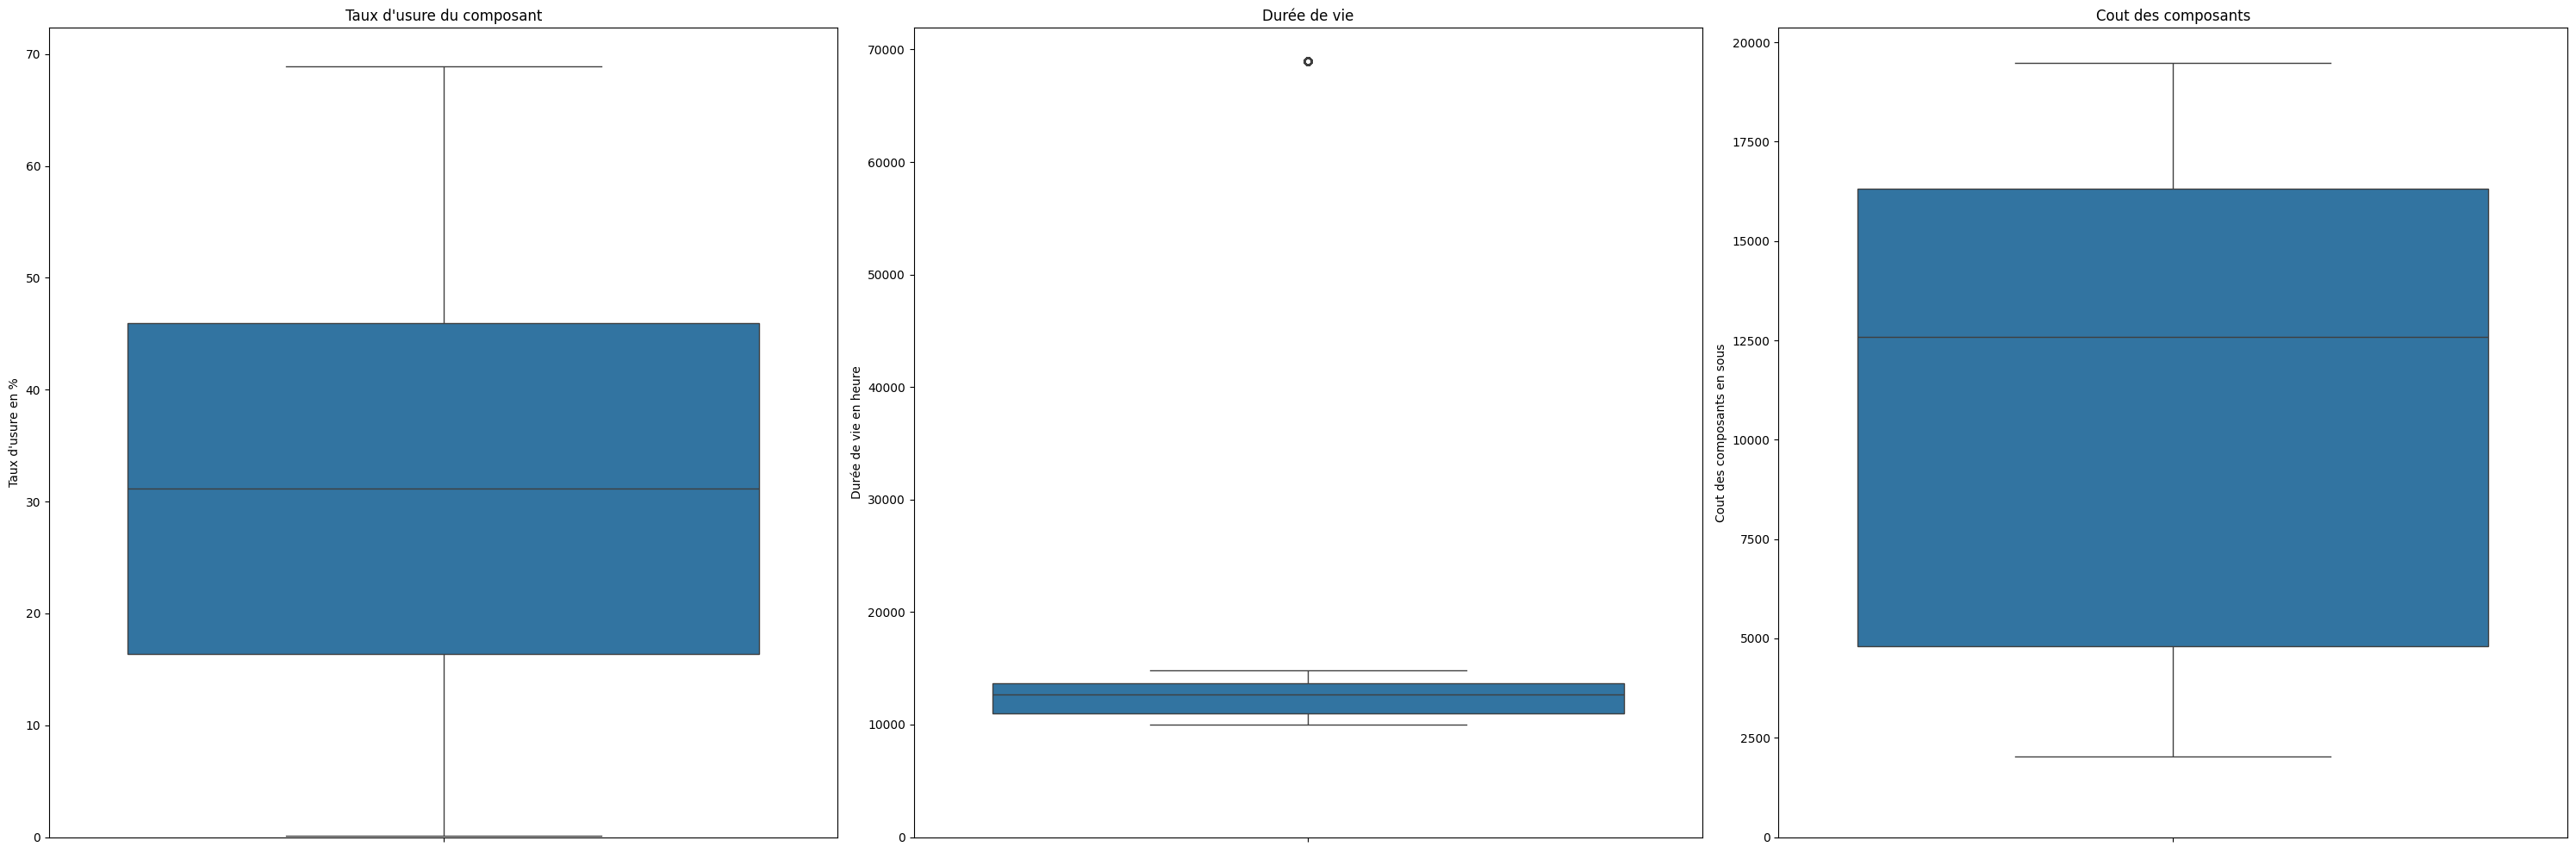

In [1967]:
# visualisation des variable numériques
fig2, axs = plt.subplots(1, 3, figsize=(30,10))

sns.boxplot(data = df_composants['taux_usure_actuel'], ax= axs[0])
axs[0].set_title(f'Taux d\'usure du composant')
axs[0].set_ylabel('Taux d\'usure en %')
axs[0].set_ylim(0, None)

sns.boxplot(data = df_composants, y= 'lifespan', ax= axs[1])
axs[1].set_title(f'Durée de vie')
axs[1].set_ylabel('Durée de vie en heure')
axs[1].set_ylim(0, None)

sns.boxplot(data = df_composants, y= 'cout', ax= axs[2])
axs[2].set_title(f'Cout des composants')
axs[2].set_ylabel('Cout des composants en sous')
axs[2].set_ylim(0, None)

plt.tight_layout()
plt.show()

In [1968]:
# observation du outlier sur durée de vie

Q1 = df_composants['lifespan'].quantile(0.25)
Q3 = df_composants['lifespan'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df_composants[(df_composants['lifespan'] < lower_bound) | (df_composants['lifespan'] > upper_bound)]

outliers.head()

,ref_compo,categorie,aero,desc,lifespan,taux_usure_actuel,cout
42,HUBE170-E170_6353-42,Composants Secondaires,E170_6353,Hublots,68978,10.533350,3593
87,HUBB767-B767_2803-42,Composants Secondaires,B767_2803,Hublots,68978,10.384812,3593
132,HUBCRJ700-CRJ700_6943-42,Composants Secondaires,CRJ700_6943,Hublots,68978,17.858964,3593
177,HUBA350-A350_1177-42,Composants Secondaires,A350_1177,Hublots,68978,46.908240,3593
222,HUBB777-B777_4029-42,Composants Secondaires,B777_4029,Hublots,68978,31.560142,3593


In [1969]:
# affichage des description différentes
outliers['desc'].unique()

array(['Hublots'], dtype=object)

Il n'y a que le composant Hublot avec une durée de vie très forte

### 3 - df_logs_vols

In [1970]:
df_logs_vols.head()

,ref_vol,aero_linked,jour_vol,time_en_air,sensor_data,etat_voyant
0,V06683852,B737_0940,2024-06-05,0.6,"{'temp': '17.8°C', 'pressure': '904.2 hPa', 'v...",0
1,V03551025,E175_6879,2024-06-05,5.2,"{'temp': '-1.3°C', 'pressure': '1029.6 hPa', '...",0
2,V04512442,A320_2562,2024-06-05,7.9,"{'temp': '16.4°C', 'pressure': '1071.7 hPa', '...",0
3,V06831692,A320_1884,2024-06-05,7.4,"{'temp': '-24.3°C', 'pressure': '905.9 hPa', '...",1
4,V05264659,A321_3033,2024-06-05,3.6,"{'temp': '5.3°C', 'pressure': '1053.8 hPa', 'v...",0


In [1971]:
skim(df_logs_vols)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 234    │ │ string      │ 4     │                                                          │
│ │ Number of columns │ 6      │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA   ┃ NA %   ┃ mean      ┃ sd        ┃ p0    ┃ p25   ┃ p50    ┃ p75  ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ time_en_air      │    0 │      0 │     5.068 │     2.444 │   0.6 │   3.3 │   5.05 │  6.7 │  12.1 │ ▅▇▇▅▂▁  │  │
│ │ etat_voyant      │    0 │      0 │    0.1624 │    0.3696 │     0 │     0 │      0 │    0 │     1 │ ▇    ▂  │  │
│ └──────────────────┴──────┴────────┴───────────┴───────────┴───────┴───────┴────────┴──────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ ref_vol                   │       0 │          0 │                            1 │                      234 │  │
│ │ aero_linked               │       0 │          0 │                            1 │                      234 │  │
│ │ jour_vol                  │       0 │          0 │                            1 │                      234 │  │
│ │ sensor_data               │       0 │          0 │                            8 │                     1872 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

### 4 - df_degradations

In [1972]:
df_degradations.head()

,ref_deg,linked_aero,compo_concerned,usure_nouvelle,measure_day,need_replacement
0,D003661,E170_6353,REAE170-E170_6353-0,54.208480,2024-06-04,False
1,D009402,E170_6353,REAE170-E170_6353-1,51.052144,2024-06-04,False
2,D000812,E170_6353,SYSE170-E170_6353-2,17.457904,2024-06-04,False
3,D006665,E170_6353,ORDE170-E170_6353-3,7.373504,2024-06-04,False
4,D001163,E170_6353,AUTE170-E170_6353-4,43.057968,2024-06-04,False


In [1973]:
skim(df_degradations)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 6554   │ │ string      │ 4     │                                                          │
│ │ Number of columns │ 6      │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ │ bool        │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name        ┃ NA  ┃ NA %   ┃ mean    ┃ sd      ┃ p0     ┃ p25   ┃ p50    ┃ p75    ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ usure_nouvelle     │   0 │      0 │   32.18 │   17.34 │   0.12 │  17.5 │  32.28 │  46.98 │  80.6 │  ▇▇▇▇▅  │  │
│ └────────────────────┴─────┴────────┴─────────┴─────────┴────────┴───────┴────────┴────────┴───────┴─────────┘  │
│                                                      bool                                                       │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                                ┃ true          ┃ true rate                 ┃ hist              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩  │
│ │ need_replacement                           │             0 │                         0 │          ▇        │  │
│ └────────────────────────────────────────────┴───────────────┴───────────────────────────┴───────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                     ┃ NA     ┃ NA %       ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ ref_deg                         │      0 │          0 │                          1 │                  6554 │  │
│ │ linked_aero                     │      0 │          0 │                          1 │                  6554 │  │
│ │ compo_concerned                 │      0 │          0 │                          1 │                  6554 │  │
│ │ measure_day                     │      0 │          0 │                          1 │                  6646 │  │
│ └─────────────────────────────────┴────────┴────────────┴────────────────────────────┴───────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

## Préparation des datasets